In [1]:
# 11.2 Exercise 
# Building a CNN Image Classifier
## Justin Wisniewski

In [2]:
# Load the MNIST data set
import numpy as np
from keras.datasets import mnist
from keras.models import Model
from keras.layers import Dense, Input
from keras.layers import Conv2D, MaxPooling2D, Dropout, Flatten
from keras import backend as k
import matplotlib.pyplot as plt

In [3]:
# Load data and target from MNIST data
(data_train, target_train), (data_test, target_test) = mnist.load_data()

Train: X=(60000, 28, 28), y=(60000,)
Test: X=(10000, 28, 28), y=(10000,)


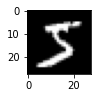

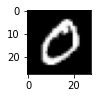

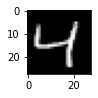

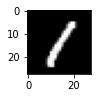

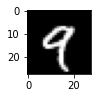

In [4]:
# Summarize loaded dataset
print('Train: X=%s, y=%s' % (data_train.shape, target_train.shape))
print('Test: X=%s, y=%s' % (data_test.shape, target_test.shape))
# Plot first five images
for i in range(5):
 # Define subplot
 plt.subplot(330 + 1 + i)
 # Plot raw pixel data
 plt.imshow(data_train[i], cmap=plt.get_cmap('gray'))
# Show the figure
 plt.show()

In [5]:
# Compare to the first five training labels
print(target_train[0])
print(target_train[1])
print(target_train[2])
print(target_train[3])
print(target_train[4])

5
0
4
1
9


5


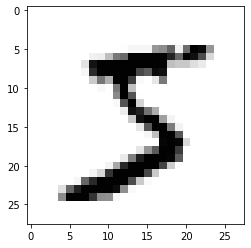

In [6]:
image_index = 0 # You may select anything up to 60,000
print(target_train[image_index])
plt.imshow(data_train[image_index], cmap='Greys')

In [7]:
img_rows, img_cols=28, 28
 
if k.image_data_format() == 'channels_first':
   data_train = data_train.reshape(data_train.shape[0], 1, img_rows, img_cols)
   data_test = data_test.reshape(data_test.shape[0], 1, img_rows, img_cols)
   inpx = (1, img_rows, img_cols)
 
else:
   data_train = data_train.reshape(data_train.shape[0], img_rows, img_cols, 1)
   data_test = data_test.reshape(data_test.shape[0], img_rows, img_cols, 1)
   inpx = (img_rows, img_cols, 1)
 
data_train = data_train.astype('float32')
data_test = data_test.astype('float32')
data_train /= 255
data_test /= 255

In [9]:
import keras
import keras.utils
from keras import utils as np_utils
target_train = keras.utils.to_categorical(target_train)
target_test = keras.utils.to_categorical(target_test)

In [10]:
inpx = Input(shape=inpx)
layer1 = Conv2D(32, kernel_size=(3, 3), activation='relu')(inpx)
layer2 = Conv2D(64, (3, 3), activation='relu')(layer1)
layer3 = MaxPooling2D(pool_size=(3, 3))(layer2)
layer4 = Dropout(0.5)(layer3)
layer5 = Flatten()(layer4)
layer6 = Dense(250, activation='sigmoid')(layer5)
layer7 = Dense(10, activation='softmax')(layer6)

In [12]:
model = Model([inpx], layer7)
model.compile(optimizer=keras.optimizers.Adadelta(),
              loss=keras.losses.categorical_crossentropy,
              metrics=['accuracy'])
 
model.fit(data_train, target_train, epochs=12, batch_size=500)

Epoch 1/12
120/120 [==============================] - 280s 2s/step - loss: 2.3589 - accuracy: 0.0986
Epoch 2/12
120/120 [==============================] - 347s 3s/step - loss: 2.3503 - accuracy: 0.0986
Epoch 3/12
120/120 [==============================] - 312s 3s/step - loss: 2.3418 - accuracy: 0.0986
Epoch 4/12
120/120 [==============================] - 279s 2s/step - loss: 2.3340 - accuracy: 0.0986
Epoch 5/12
120/120 [==============================] - 288s 2s/step - loss: 2.3265 - accuracy: 0.0986
Epoch 6/12
120/120 [==============================] - 301s 2s/step - loss: 2.3195 - accuracy: 0.0986
Epoch 7/12
120/120 [==============================] - 299s 2s/step - loss: 2.3129 - accuracy: 0.0986
Epoch 8/12
120/120 [==============================] - 310s 3s/step - loss: 2.3066 - accuracy: 0.0986
Epoch 9/12
120/120 [==============================] - 301s 3s/step - loss: 2.3005 - accuracy: 0.0986
Epoch 10/12
120/120 [==============================] - 305s 3s/step - loss: 2.2947 - accura

In [13]:
score = model.evaluate(data_test, target_test, verbose=0)
print('loss=', score[0])
print('accuracy=', score[1])

loss= 2.2816460132598877
accuracy= 0.0957999974489212


In [21]:
from sklearn.metrics import confusion_matrix
import tensorflow as tf
from tensorflow.keras import datasets, layers, models

# Get predictions
y_pred = model.predict(data_train, verbose=2)
num_of_classess = 10 

# Compute confusion matrix with `tf` 
confusion = tf.math.confusion_matrix(
              labels = np.argmax(target_train, axis=1),      # get trule labels 
              predictions = np.argmax(y_pred, axis=1),  # get predicted labels 
              num_classes=num_of_classess)              # no. of classifier 

print(confusion)

1875/1875 - 117s - 117s/epoch - 63ms/step
tf.Tensor(
[[   0    0    0    0    0    0 5923    0    0    0]
 [   0    0    0    0    0    0 6742    0    0    0]
 [   0    0    0    0    0    0 5958    0    0    0]
 [   0    0    0    0    0    0 6131    0    0    0]
 [   0    0    0    0    0    0 5842    0    0    0]
 [   0    0    0    0    0    0 5421    0    0    0]
 [   0    0    0    0    0    0 5918    0    0    0]
 [   0    0    0    0    0    0 6265    0    0    0]
 [   0    0    0    0    0    0 5851    0    0    0]
 [   0    0    0    0    0    0 5949    0    0    0]], shape=(10, 10), dtype=int32)


In [ ]:
# The results do not appear to be accurate based off what I have seen in similar examples online.  I do bleieve they are supposed to be spread out
# amongst the different classes, but I also am not 100% sure.